Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

- [Pandas website](http://pandas.pydata.org).
- *Python for Data Analysis* by Wes McKinney ([O'Reilly Media](http://shop.oreilly.com/product/0636920023784.do)).
- [Analyzing and Manipulating Data with Pandas Beginner](https://youtu.be/6ohWS7J1hVA) | SciPy 2016 Tutorial | Jonathan Rocher.


![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 
```sh
conda install pandas
pip install pandas
```

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# Object Creation: [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

In [171]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [182]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

# Object Creation: [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

In [3]:
dates = pd.date_range('20130101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,-0.440660,-0.055325,-0.998440,0.498093
2013-01-02,0.587393,-0.095344,1.594715,-0.574507
2013-01-03,-1.904480,-0.032786,0.062042,-0.073545
2013-01-04,0.709135,1.198756,-0.700071,-0.177922
2013-01-05,-1.961838,0.399953,0.780889,-0.609968
2013-01-06,1.205600,-2.398654,0.186779,1.111408


In [4]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20130102'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' })


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# [Load data](http://pandas.pydata.org/pandas-docs/stable/io.html)

We load data from [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cag/time-series/global). This series is the mean of temperatures measured on the globe from 1901 to 2010.

In [5]:
filename = "https://www1.ncdc.noaa.gov/pub/data/anomalies/usingGHCNMv2/annual.land_ocean.90S.90N.df_1901-2000mean.dat"
#pd.read_table?
full_globe_temp = pd.read_table(filename)
full_globe_temp

,1880 -0.1373
0,1881 -0.0600
1,1882 -0.1130
2,1883 -0.1505
3,1884 -0.2323
...,...
127,2008 0.4842
128,2009 0.5588
129,2010 0.6147
130,2011 -999.0000


### Values are separated by spaces

In [6]:
full_globe_temp = pd.read_table(filename, sep="\s+")
full_globe_temp

,1880,-0.1373
0,1881,-0.0600
1,1882,-0.1130
2,1883,-0.1505
3,1884,-0.2323
...,...,...
127,2008,0.4842
128,2009,0.5588
129,2010,0.6147
130,2011,-999.0000


### Change the column name

In [7]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean temp"])
full_globe_temp

,year,mean temp
0,1880,-0.1373
1,1881,-0.0600
2,1882,-0.1130
3,1883,-0.1505
...,...,...
128,2008,0.4842
129,2009,0.5588
130,2010,0.6147
131,2011,-999.0000


### Set index to the year of the record

In [148]:
full_globe_temp = pd.read_table(filename, sep="\s+", 
                                names=["year", "mean temp"], 
                                index_col=0)
full_globe_temp

,mean temp
year,
1880,-0.1373
1881,-0.0600
1882,-0.1130
1883,-0.1505
...,...
2008,0.4842
2009,0.5588
2010,0.6147
2011,-999.0000


Index is the most important attribute of a Series or DataFrame because it is used into the structures to access the information.


In [9]:
full_globe_temp.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year', length=132)

### This table is a pandas DataFrame with only one column

In [10]:
type(full_globe_temp)

pandas.core.frame.DataFrame

### Create a Series from this DataFrame

In [11]:
full_globe_temp = full_globe_temp["mean temp"]
print(type(full_globe_temp))
print(full_globe_temp.dtype)
print(full_globe_temp.shape)
print(full_globe_temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(132,)
1056


### NumPy arrays as backend of Pandas

In [12]:
type(full_globe_temp.values)

numpy.ndarray

In the dataset, -999.00 was used to indicate that there was no value for that year.

In [13]:
full_globe_temp[full_globe_temp.values == -999.00]

year
2011   -999.0
Name: mean temp, dtype: float64

### Setting missing values

Replace the missing value (-999.000) with what Pandas understand: np.nan

In [14]:
full_globe_temp[full_globe_temp == -999.000] = np.nan
full_globe_temp.tail()

year
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Name: mean temp, dtype: float64

### Removing missing values

Once they have been converted to np.nan, missing values can be removed (dropped).

In [15]:
full_globe_temp.dropna().tail() # NaN value is removed

year
2006    0.5623
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
Name: mean temp, dtype: float64

### Visualization

`.plot` generates a basic visualization using matplotlib.


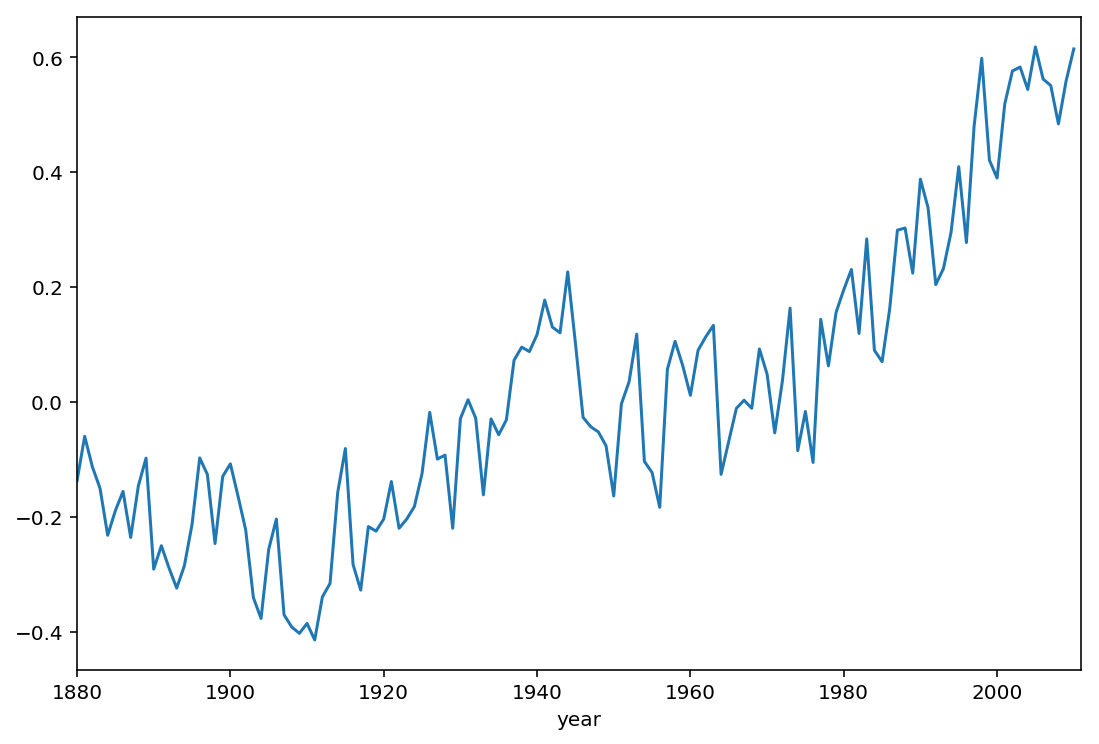

In [16]:
full_globe_temp.plot();

## Seaborn

[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) plots data and a linear regression model fit  (plot was easier if we kept the DataFrame format).

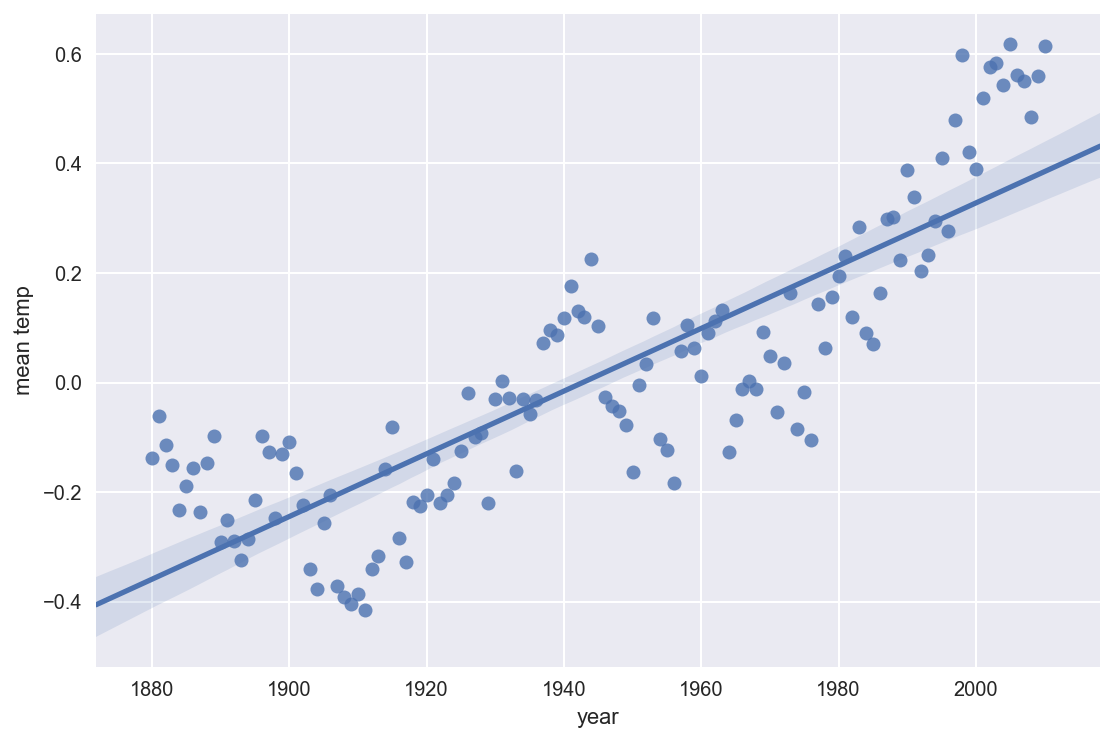

In [17]:
import seaborn as sns
sns.set()

sns.regplot(x=full_globe_temp.index.to_series(),
            y=full_globe_temp);


In [18]:
full_globe_temp[:-1].index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year', length=131)

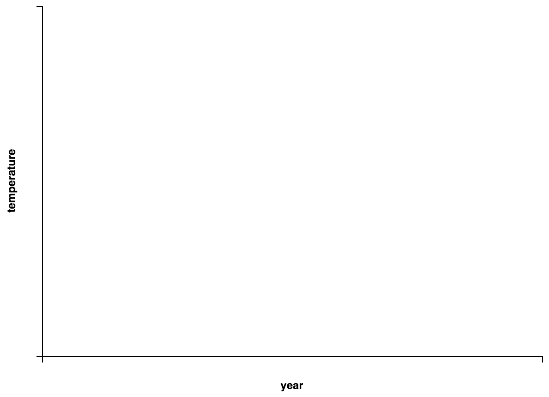

In [147]:
from altair import Chart, Scale, X

data = pd.DataFrame({"year": full_globe_temp[:-1].index,
                    "temperature": full_globe_temp[:-1].values})
Chart(data).mark_line().encode(X("year",scale=Scale(zero=False)),
                               y = "temperature")

# Load Data from CSV File

In [60]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
french_cities = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
french_cities

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Viewing Data

In [61]:
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [62]:
french_cities.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Index

In [63]:
french_cities.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

We can rename an index by setting its name.

In [64]:
df.index.name = "City"
df.head()

,jan,fév,mar,avr,mai,jui,jul,aoû,sep,oct,nov,déc,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


# Toyplot https://toyplot.readthedocs.io

In [65]:
import toyplot
canvas = toyplot.Canvas(width=640, height=480)
axes = canvas.cartesian(xlabel="Latitude", 
                        ylabel=u"Temperature \u00b0C")

for lati, moye, ville in zip(df['Lati'],df["Moye"],df.index):
    axes.text(lati, moye, ville, 
              style={"-toyplot-anchor-shift":"10px",
                     "text-anchor":"start",
                     "font-size":"14px"})
    axes.scatterplot(lati, moye, color="black")


Bordeaux Brest Clermont Grenoble Lille Lyon Marseille Montpellier Nantes Nice Paris Rennes Strasbourg Toulouse Vichy 42 45 48 50 Latitude 9 11 13 15 Temperature °C

# matplotlib
```bash
pip3 install adjusttext
```

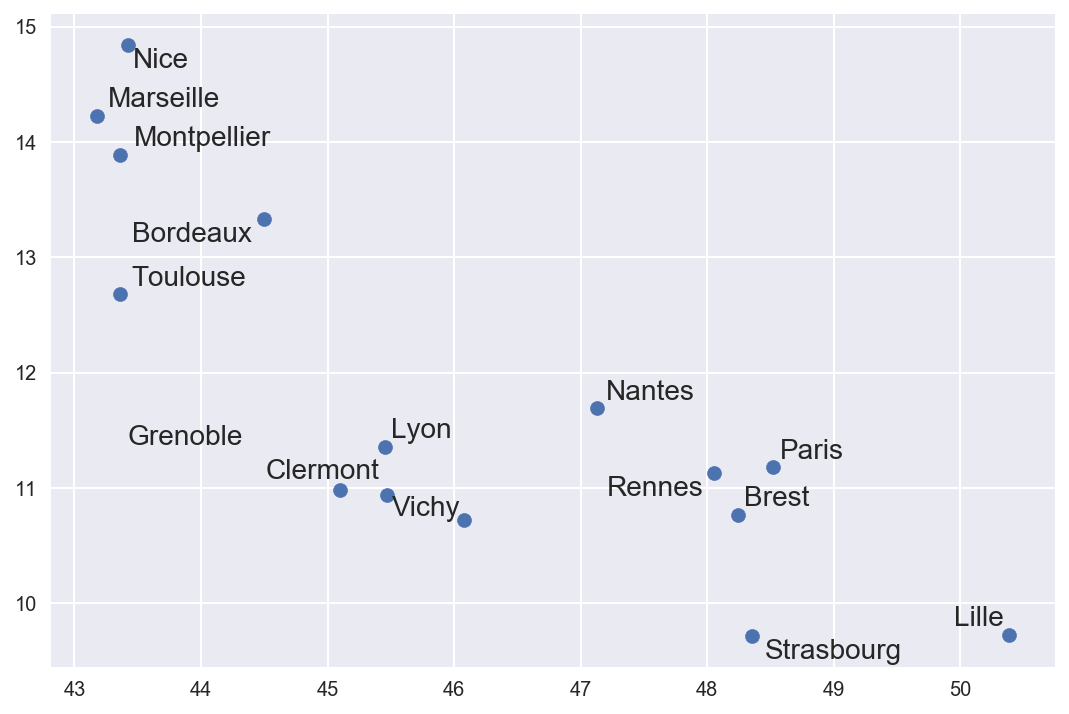

In [67]:
from adjustText import adjust_text

x, y = df['Lati'],df["Moye"]
labels = df.index
plt.scatter(x, y)
texts = []
for x0, y0, s0 in zip(x,y,labels):
    texts.append(plt.text(x0, y0, s0, size=14))
adjust_text(texts, x, y);

# Exercice 
## Rename DataFrame Months in English

In [89]:
import locale
import calendar

locale.setlocale(locale.LC_ALL,'en_US')

months = calendar.month_abbr
print(*months)

 Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


In [90]:
french_cities.rename(
  columns={ old : new for old, new in zip(french_cities.columns[:12], months[1:])},
  inplace=True)
french_cities.columns[:12]

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

# From a local or remote HTML file
We can download and extract data about mean sea level stations around the world from the [PSMSL website](http://www.psmsl.org/).

In [94]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
# Local backup in data/sea_levels/Obtaining Tide Gauge Data.html
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [95]:
# there is 1 table on that page which contains metadata about the stations where 
# sea levels are recorded
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,24/01/2017,60,281
...,...,...,...,...,...,...,...,...,...
1502,"LIME TREE BAY, ST CROIX",1447,17.693,-64.753,NaN,VIR,02/02/2017,939,11
1503,CHRISTIANSTED HARBOUR,2118,17.750,-64.705,NaN,VIR,02/02/2017,939,15
1504,LAMESHUR BAY,2119,18.317,-64.723,NaN,VIR,02/02/2017,939,21
1505,ADEN,44,12.788,44.974,3.0,YEM,01/02/2016,485,1


# Indexing on Series
- By default [] on a series accesses values using the index, not the location in the series.

In [88]:
first_date = full_globe_temp.index[0]
first_date == 1880,  full_globe_temp[1880]

(True, -0.13730000000000001)

- This kind of indexing is sometimes ambiguous
- Pandas provides another more explicit way to do the same thing with `loc` and `iloc`.

In [89]:
print(full_globe_temp[1880], full_globe_temp[2011])
print(full_globe_temp.loc[1880], full_globe_temp.loc[2011])
print(full_globe_temp.iloc[0], full_globe_temp.iloc[-1])

-0.1373 nan
-0.1373 nan
-0.1373 nan


In [90]:
full_globe_temp.index[-1] # Year of the last record

2011

In [92]:
full_globe_temp[2011] = np.nan # New records can be added:
full_globe_temp.iloc[-1]
full_globe_temp

year
1880   -0.1373
1881   -0.0600
1882   -0.1130
1883   -0.1505
         ...  
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Name: mean temp, Length: 132, dtype: float64

# Indexing on DataFrames

In [102]:
french_cities['Lati']  # DF [] accesses columns (Series)

Bordeaux      44.50
Brest         48.24
Clermont      45.47
Grenoble      45.10
              ...  
Rennes        48.05
Strasbourg    48.35
Toulouse      43.36
Vichy         46.08
Name: Lati, Length: 15, dtype: float64

`.loc` and `.iloc` allow to access individual values, slices or masked selections:

In [103]:
french_cities.loc['Rennes', "Sep"]

15.699999999999999

In [106]:
french_cities.loc['Rennes', ["Sep", "Dec"]]

Sep    15.7
Dec     5.4
Name: Rennes, dtype: object

In [109]:
french_cities.loc['Rennes', "Sep":"Dec"]

Sep    15.7
Oct    11.6
Nov     7.8
Dec     5.4
Name: Rennes, dtype: object

# Masking

In [112]:
mask = [True, False] * 6
print(french_cities.iloc[0, mask])
print(french_cities.loc["Rennes", mask])

Jan     5.6
Mar    10.3
May    15.8
Jul    20.9
Sep    18.6
Nov     9.1
Name: Bordeaux, dtype: object
Jan     4.8
Mar     7.9
May    13.1
Jul    17.9
Sep    15.7
Nov     7.8
Name: Rennes, dtype: object


# New column


In [128]:
french_cities["std"] = french_cities.iloc[:,:12].std(axis=1)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,std
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE,6.770771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO,4.958800
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE,6.931723
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO,6.056977
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE,6.201148


In [129]:
french_cities = french_cities.drop("std", axis=1) # remove this new column

# Modifying a dataframe with multiple indexing

In [133]:
french_cities['Sep']['Rennes'] = 25 # This works right now, but this is dangerous:

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
french_cities.loc['Sep','Rennes'] = 15.7

# Working with dates and times

Index dtype is NumPy's new 'int64Index':

In [157]:
full_globe_temp.index.dtype

period[A-DEC]

Use Real datetime index and add a flag to signal if the value is before or after the great depression's black Friday:

In [158]:
black_friday = pd.to_datetime('1929-10-29')
full_globe_temp.index  = pd.to_datetime(full_globe_temp.index,format='%Y')
full_globe_temp.index > black_friday

TypeError: Argument 'values' has incorrect type (expected numpy.ndarray, got Index)

# Timestamps to periods
Convert its index from timestamp to period is more meaningfull since it was measured and averaged over the year...


In [159]:
full_globe_temp.index = full_globe_temp.index.to_period()
full_globe_temp

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [160]:
full_globe_temp.index.dtype

period[A-DEC]

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Series converted to 10 year blocks:

In [163]:
full_globe_temp.resample("10A").mean()

,mean temp
year,
1880-01,-0.1373
1880-02,NaN
1880-03,NaN
1880-04,NaN
...,...
2011-09,NaN
2011-10,NaN
2011-11,NaN
2011-12,NaN


### Upscale to a monthly series

In [164]:
full_globe_temp.resample("M").mean()

,mean temp
year,
1880-01,-0.1373
1880-02,NaN
1880-03,NaN
1880-04,NaN
...,...
2011-09,NaN
2011-10,NaN
2011-11,NaN
2011-12,NaN


In [32]:
city_temp = df.transpose()
city_temp = city_temp[:-5]
city_temp

City,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
Jan,5.6,6.1,2.6,1.5,2.4,2.1,5.5,5.6,5,7.5,3.4,4.8,0.4,4.7,2.4
Feb,6.6,5.8,3.7,3.2,2.9,3.3,6.6,6.7,5.3,8.5,4.1,5.3,1.5,5.6,3.4
Mar,10.3,7.8,7.5,7.7,6,7.7,10,9.9,8.4,10.8,7.6,7.9,5.6,9.2,7.1
Apr,12.8,9.2,10.3,10.6,8.9,10.9,13,12.8,10.8,13.3,10.7,10.1,9.8,11.6,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sep,18.6,14.7,16.2,16.7,14.7,16.9,19.9,19.3,16.4,20.3,16,15.7,15.1,18.3,16
Oct,13.8,12,11.2,11.4,10.4,11.4,15,14.6,12.2,16,11.4,11.6,9.5,13.3,11
Nov,9.1,9,6.6,6.5,6.1,6.7,10.2,10,8.2,11.5,7.1,7.8,4.9,8.6,6.6
Dec,6.2,7,3.6,2.3,3.5,3.1,6.9,6.5,5.5,8.2,4.3,5.4,1.3,5.5,3.4


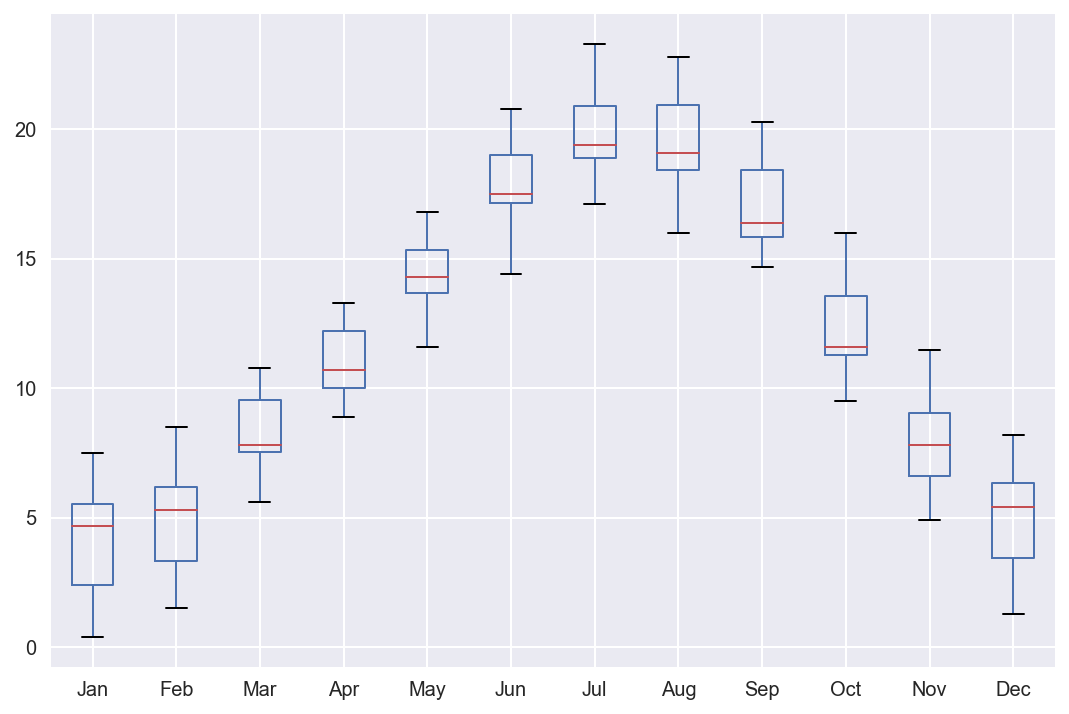

In [43]:
df.iloc[:,:12].boxplot();

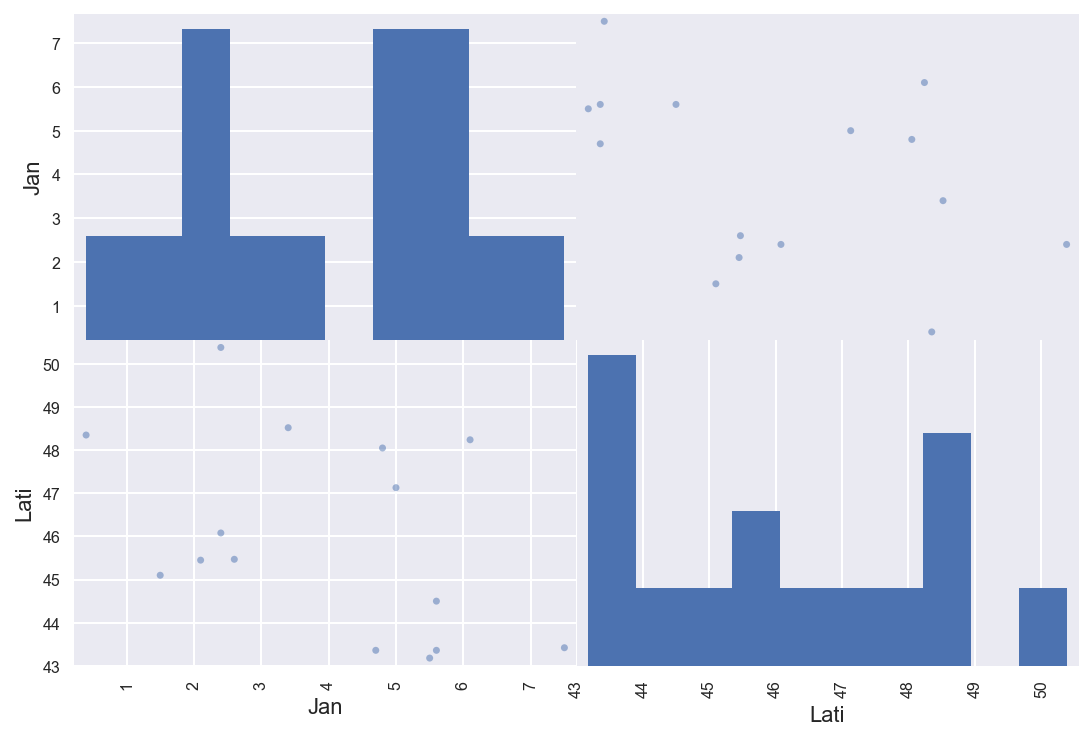

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,[0,12]]);

# Saving Work

Excel Writer does not work with Series.

In [58]:
with pd.ExcelWriter("data/test.xls") as writer:
    orange.to_excel(writer, sheet_name="Orange data")
    pd.DataFrame({"Full Globe Temp": full_globe_temp}).to_excel(writer, sheet_name="FullGlobe temp data")

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [178]:
with pd.HDFStore("data/pandas_nb.h5") as writer:
    orange.to_hdf(writer, "/orange")
    full_globe_temp.to_hdf(writer, "/temperatures/full_globe")
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

In [180]:
%ls data

cemracs.csv   pandas_nb.h5  test.xls


## Transferring R data sets into Python

In [50]:
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()
r.library('missMDA')
r.data('orange')
orange = r('orange')

In [49]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [52]:
orange.describe()
orange.fillna(method="bfill")
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
...,...,...,...,...,...,...,...,...
9,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000
11,4.083333,5.125000,3.916667,NaN,NaN,NaN,7.333333,5.250000
12,6.500000,5.875000,6.125000,4.875000,5.291667,4.166667,1.500000,3.500000


# Missing Data

* To signal a missing value, Pandas stores a NaN (Not a Number) value defined in NumPy (np.nan).
* Unlike other packages (like NumPy), most operators in Pandas will ignore NaN values in a Pandas datastructure.
